<a href="https://colab.research.google.com/github/kaushikpichumani/Stock-Market-Analysis/blob/main/MinLevelStockData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
from pytz import timezone 
df = pd.DataFrame(pd.DataFrame(
                  columns = ['name' , 'prevClose', 'price','time' ]))
plt.rcParams['figure.figsize'] = [20, 10]
from scipy.stats import pearsonr
pcrVal=[]

PCR VAL: 0.99


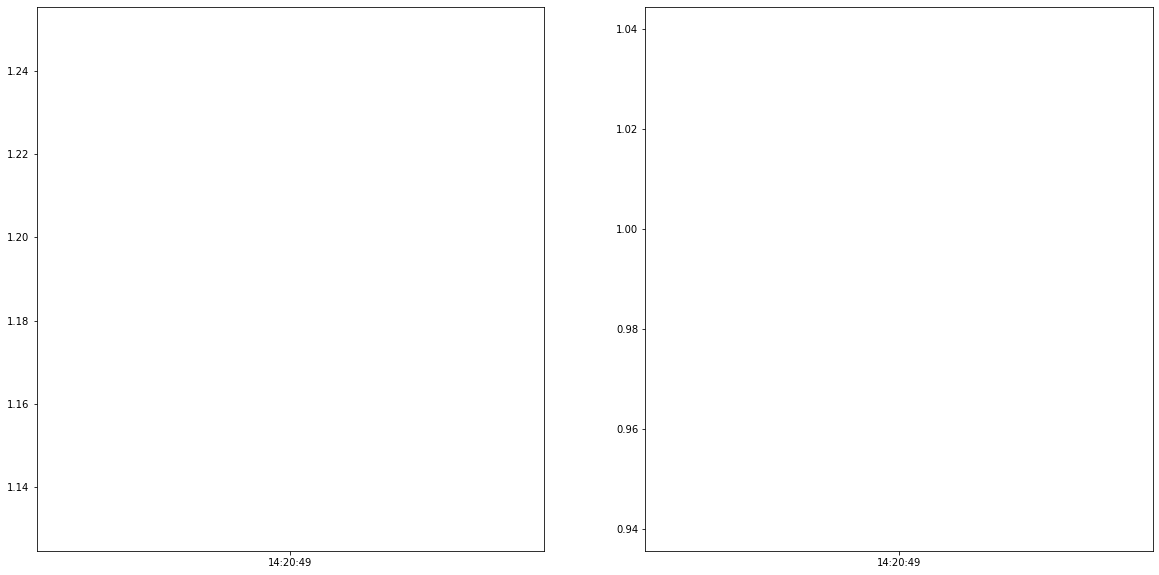

KeyboardInterrupt: ignored

In [8]:
for i in range(380):
    now = datetime.now(timezone("Asia/Kolkata"))
    clear_output(wait=True)
    current_time = now.strftime("%H:%M:%S")
    page=requests.get('https://www.moneycontrol.com/indian-indices/bank-nifty-23.html')
    soup = BeautifulSoup(page.content,'html.parser')
    prevClose = soup.find("span", id="sp_previousclose").get_text()
    price = soup.find(class_="inprice1").get_text()
    page1=requests.get('https://www.moneycontrol.com/india/indexfutures/banknifty/23/?classic=true')
    soup1 = BeautifulSoup(page1.content,'html.parser')
    price1 = soup1.find(class_="tbldata").get_text()
    pcr = price1.split('\n\n')[6].split('\n')[2]
    print('PCR VAL:',pcr)
    pcrVal.append(float(pcr))
    df2 = pd.DataFrame({'name':['bankNifty'],'prevClose':[float(" ".join(prevClose.split()).replace(',',''))],'price':[float(" ".join(price.split()).replace(',',''))],'time':[current_time]})
    df = df.append(df2)
    df['PCR'] = pcrVal
    
    df['change']=round((((df['price'])-df['prevClose'])/df['prevClose'])*100,2)
    #corr, _ = pearsonr(df['change'].tolist(),pcrVal)
    #print('Pearsons correlation: %.3f' % corr)
    plt.subplot(1, 2, 1)
    plt.plot(df['time'],df['change'])
    plt.subplot(1, 2, 2)
    plt.plot(df['time'].tolist(),pcrVal)
    plt.show()
    time.sleep(60)
    #plt.close(fig)
    
    


In [ ]:
df.to_csv('C:\\Users\\pkalyan\\Desktop\\docs\\stock_03-01.csv')